# DỰ ĐOÁN GIÁ CỔ PHIẾU THEO KHỐI LƯỢNG 

In [2]:
# Những thư viện được sử dụng trong bài
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Câu 1: Đọc và hiển thị các thông tin từ file vnstock_listing_companies.csv.


In [3]:
# Đọc và hiển thị các thông tin từ file vnstock_listing_companies.csv.
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/vnstock_listing_companies.csv")
print(data)

     ticker exchange                     shortName  \
0       CMV     HOSE          Thương nghiệp Cà Mau   
1       COM     HOSE               Vật tư Xăng dầu   
2       DHT      HNX              Dược phẩm Hà Tây   
3       DGW     HOSE                   Thế Giới Số   
4       TTH      HNX           TM và DV Tiến Thành   
...     ...      ...                           ...   
1150    VAV    UPCOM                        VIWACO   
1151    VPD     HOSE  Phát triển Điện lực Việt Nam   
1152    NTH      HNX          Thủy điện Nước Trong   
1153    PPT    UPCOM                   Petro Times   
1154    TOW    UPCOM      Cấp nước Trà Nóc - Ô Môn   

                           industry industryEn  establishedYear  noEmployees  \
0                            Bán lẻ     Retail           1980.0        666.0   
1                            Bán lẻ     Retail           2000.0          0.0   
2                            Bán lẻ     Retail           2001.0        795.0   
3                            Bá

In [4]:
# Danh sách các cột
columns = data.columns
print("Danh sách các cột:")
for column in columns:
    print(column)

# Số dòng dữ liệu của bảng
num_rows = len(data)
print("Số dòng dữ liệu của bảng:", num_rows)

Danh sách các cột:
ticker
exchange
shortName
industry
industryEn
establishedYear
noEmployees
noShareholders
foreignPercent
website
stockRating
outstandingShare
issueShare
companyType
monthlyRecords
Số dòng dữ liệu của bảng: 1155


#### Câu 2: Viết hàm find_stock để tìm mã số cổ phiếu X dựa vào mã số sinh viên (MSSV) 1 thành viên nhóm tùy theo nhóm lựa chọn

In [5]:
def find_stock(mssv):
    # Lấy 4 số cuối của MSSV bằng cách lấy từ vị trí -4 của chuỗi mssv đến hết và chuyển đổi nó thành một số nguyên.
    last_4_digits = int(mssv[-4:])

    # Tính số thứ tự của mã chứng khoán X bằng cách lấy phần nguyên của last_4_digits khi chia cho 10.
    stock_index = last_4_digits // 10

    # Lấy mã chứng khoán X từ số thứ tự bằng cách truy cập vào dữ liệu data tại vị trí stock_index và lấy giá trị của cột 'ticker'.
    stock_code = data.iloc[stock_index]['ticker']

    return stock_code

# Thực thi hàm find_stock với mã số sinh viên
student_mssv = '030237210133'  # Chúng em lấy MSSV của bạn Đoàn Trương Khánh Nhi
result = find_stock(student_mssv)

# In kết quả
print("Mã số cổ phiếu X tương ứng với MSSV", student_mssv, "là:", result)

Mã số cổ phiếu X tương ứng với MSSV 030237210133 là: AGX


#### Câu 3: Hiển thị thông tin tương ứng của cổ phiếu X từ file vnstock_listing_companies.csv. Các thông tin cần hiển thị bao gồm: ticker, shortName, monthlyRecords

In [6]:
def find_stock_info(stock_code):

    # Tìm kiếm thông tin cổ phiếu với stock_code bằng cách truy cập vào dữ liệu data và lấy các hàng mà giá trị trong cột 'ticker' bằng stock_code.
    stock_info = data[data['ticker'] == stock_code]
    return stock_info

# Thay thế "your_stock_code" bằng mã số cổ phiếu X được tìm thấy
your_stock_code = "AGX"

# Gọi hàm find_stock_info để tìm thông tin cổ phiếu AGX với mã your_stock_code và gán kết quả vào biến stock_info.
stock_info = find_stock_info(your_stock_code)

# Kiểm tra xem có thông tin tương ứng hay không bằng cách kiểm tra độ dài của stock_info.
if len(stock_info) > 0:
    # In thông tin về cổ phiếu
    print("Thông tin về cổ phiếu", your_stock_code)
    print("Ticker:",  stock_info.iloc[0]['ticker'])
    print("Short Name:", stock_info.iloc[0]['shortName'])
    print("Monthly Records:", stock_info.iloc[0]['monthlyRecords'])
else:
    print("Không tìm thấy thông tin cho mã cổ phiếu", your_stock_code)

Thông tin về cổ phiếu AGX
Ticker: AGX
Short Name: Nông sản Xuất khẩu Sài Gòn
Monthly Records: AGX.csv


#### Câu 4: Thực hiện thống kê số lượng giao dịch, giá Close trung bình, giá Close cao nhất, giá Close thấp nhất của cổ phiếu X trong khoảng thời gian từ tháng 8 đến tháng 9 năm 2023.

In [7]:
# Đọc và hiển thị file CSV của cổ phiếu AGX
agx_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AGX.csv")
print(agx_data)

          time   open   high    low  close  volume ticker
0   2023-01-05  39020  39020  39020  39020     100    AGX
1   2023-01-13  38050  38050  38050  38050     200    AGX
2   2023-01-27  35650  35650  35650  35650    1100    AGX
3   2023-01-30  33720  33720  33720  33720     400    AGX
4   2023-01-31  33720  33720  32759  33720    5900    AGX
5   2023-02-01  32759  34680  32759  34680    3100    AGX
6   2023-02-02  33720  37770  33720  33720  270600    AGX
7   2023-02-03  33720  37770  33720  37770   89300    AGX
8   2023-02-07  29870  38050  29870  38050     600    AGX
9   2023-02-08  32560  32560  32560  32560     100    AGX
10  2023-02-10  33720  37380  33720  37380    4600    AGX
11  2023-02-13  33910  33910  33910  33910     500    AGX
12  2023-02-21  38630  38630  38630  38630     100    AGX
13  2023-02-23  37770  37770  37770  37770     100    AGX
14  2023-03-10  38730  38730  38730  38730     100    AGX
15  2023-03-28  37770  37770  37770  37770     900    AGX
16  2023-03-31

In [8]:
# Lọc dữ liệu theo khoảng thời gian từ tháng 8 đến tháng 9 năm 2023
ngay_bat_dau = '2023-08-01'
ngay_ket_thuc = '2023-09-30'
loc_data = agx_data[(agx_data['time'] >= ngay_bat_dau) & (agx_data['time'] <= ngay_ket_thuc)]

# Thống kê số lượng giao dịch
so_giao_dich = len(loc_data)

# Tính giá Close trung bình
gia_close_tb = loc_data['close'].mean()

# Tìm giá Close cao nhất và thấp nhất
gia_close_max = loc_data['close'].max()
gia_close_min = loc_data['close'].min()

# In kết quả ra màn hình
print("Thống kê cổ phiếu AGX trong khoảng thời gian từ tháng 8 đến tháng 9")
print("Số lượng giao dịch:", so_giao_dich)
print("Giá Close trung bình:", gia_close_tb)
print("Giá Close cao nhất:", gia_close_max)
print("Giá Close thấp nhất:", gia_close_min)

# In file đã lọc từ tháng 8 đến tháng 9 ra
loc_data.to_csv('filtered_agx.csv', index=False)

Thống kê cổ phiếu AGX trong khoảng thời gian từ tháng 8 đến tháng 9
Số lượng giao dịch: 10
Giá Close trung bình: 38910.0
Giá Close cao nhất: 42500
Giá Close thấp nhất: 37000


#### Câu 5: Từ lịch sử giao dịch trên, thêm cột (Info01) cho biết giá Close mỗi ngày là lớn hơn (giá trị 1), nhỏ hơn (giá trị -1), bằng (giá trị 0), so với giá Open của ngày đó.

In [9]:
# Đọc và hiển thị file CSV của cổ phiếu AGX đã lọc
filtered_agx = pd.read_csv("/content/filtered_agx.csv")
print(filtered_agx)

         time   open   high    low  close  volume ticker
0  2023-08-02  37000  37000  37000  37000     100    AGX
1  2023-08-04  40000  40000  40000  40000     200    AGX
2  2023-08-09  40000  40000  40000  40000     700    AGX
3  2023-08-10  40000  40000  40000  40000     800    AGX
4  2023-08-15  37000  37000  37000  37000     100    AGX
5  2023-08-21  37000  37000  37000  37000     100    AGX
6  2023-08-22  37000  37000  37000  37000     100    AGX
7  2023-08-29  42000  42500  42000  42500    1200    AGX
8  2023-08-31  40000  47000  38000  38000     500    AGX
9  2023-09-18  40600  40600  40600  40600     400    AGX


In [10]:
# Thêm cột "Info01" với giá trị mặc định là 0
filtered_agx['Info01'] = 0

# Áp dụng hàm apply để so sánh giá Close và giá Open và cập nhật giá trị trong cột "Info01"
filtered_agx['Info01'] = filtered_agx.apply(lambda row: 1 if row['close'] > row['open'] else (-1 if row['close'] < row['open'] else 0), axis=1)  #  Nếu giá trị "close" > giá trị "open", thì giá trị trong cột "Info01" là 1. Nếu giá trị "close" < giá trị "open", thì giá trị trong cột "Info01" là -1. Nếu giá trị "close" = giá trị "open", thì giá trị trong cột "Info01" là 0.

# In kết quả
print("Dữ liệu giao dịch của cổ phiếu AGX sau khi thêm cột 'Info01':")
print(filtered_agx)

Dữ liệu giao dịch của cổ phiếu AGX sau khi thêm cột 'Info01':
         time   open   high    low  close  volume ticker  Info01
0  2023-08-02  37000  37000  37000  37000     100    AGX       0
1  2023-08-04  40000  40000  40000  40000     200    AGX       0
2  2023-08-09  40000  40000  40000  40000     700    AGX       0
3  2023-08-10  40000  40000  40000  40000     800    AGX       0
4  2023-08-15  37000  37000  37000  37000     100    AGX       0
5  2023-08-21  37000  37000  37000  37000     100    AGX       0
6  2023-08-22  37000  37000  37000  37000     100    AGX       0
7  2023-08-29  42000  42500  42000  42500    1200    AGX       1
8  2023-08-31  40000  47000  38000  38000     500    AGX      -1
9  2023-09-18  40600  40600  40600  40600     400    AGX       0


#### Câu 6: Từ lịch sử giao dịch trên, tạo thêm cột (Info02) cho biết giá Close mỗi ngày giao dịch là tăng (giá trị 1), giảm (giá trị -1), bằng (giá trị 0), so với giá Close ngày trước đó. Lưu tất cả thông tin (bao gồm cả Info01 và Info02) ra file {X}_Stock.csv.

In [13]:
# Dùng hàm diff trong pandas để tính toán sự khác biệt giữa các phần tử liên tiếp
filtered_agx['Info02'] = filtered_agx['close'].diff()

# Tạo vòng lặp để xác định giá trị của 'Info02' dựa trên giá Close của các ngày liền trước
for i in range(1, len(filtered_agx)):
    if filtered_agx.loc[i, 'close'] > filtered_agx.loc[i-1, 'close']:  # Nếu giá trị "close" của hàng hiện tại > giá trị "close" của hàng liền trước.
        filtered_agx.loc[i, 'Info02'] = 1    # Thì gán giá trị 1 cho cột "Info02" của hàng hiện tại nếu điều kiện trên đúng.
    elif filtered_agx.loc[i, 'close'] < filtered_agx.loc[i-1, 'close']:   # Nếu giá trị "close" của hàng hiện tại < giá trị "close" của hàng liền trước.
        filtered_agx.loc[i, 'Info02'] = -1   # Thì gán giá trị -1 cho cột "Info02" của hàng hiện tại nếu điều kiện trên đúng.

# In kết quả
print("Dữ liệu giao dịch của cổ phiếu AGX sau khi thêm cột 'Info02':")
print(filtered_agx)

# Lưu thông tin (bao gồm cả "Info01" và "Info02") vào file {X}_Stock.csv mà bao gồm cột chỉ mục.
filtered_agx.to_csv('AGX_Stock.csv', index=True)

# In thông báo thành công
print("Dữ liệu đã được lưu vào file AGX_Stock.csv")

Dữ liệu giao dịch của cổ phiếu AGX sau khi thêm cột 'Info02':
         time   open   high    low  close  volume ticker  Info01  Info02
0  2023-08-02  37000  37000  37000  37000     100    AGX       0     NaN
1  2023-08-04  40000  40000  40000  40000     200    AGX       0     1.0
2  2023-08-09  40000  40000  40000  40000     700    AGX       0     0.0
3  2023-08-10  40000  40000  40000  40000     800    AGX       0     0.0
4  2023-08-15  37000  37000  37000  37000     100    AGX       0    -1.0
5  2023-08-21  37000  37000  37000  37000     100    AGX       0     0.0
6  2023-08-22  37000  37000  37000  37000     100    AGX       0     0.0
7  2023-08-29  42000  42500  42000  42500    1200    AGX       1     1.0
8  2023-08-31  40000  47000  38000  38000     500    AGX      -1    -1.0
9  2023-09-18  40600  40600  40600  40600     400    AGX       0     1.0
Dữ liệu đã được lưu vào file AGX_Stock.csv


#### Câu 7: Từ file X_Stock.csv trên, vẽ các đường [Open, High, Low, Close] của cổ phiếu X.

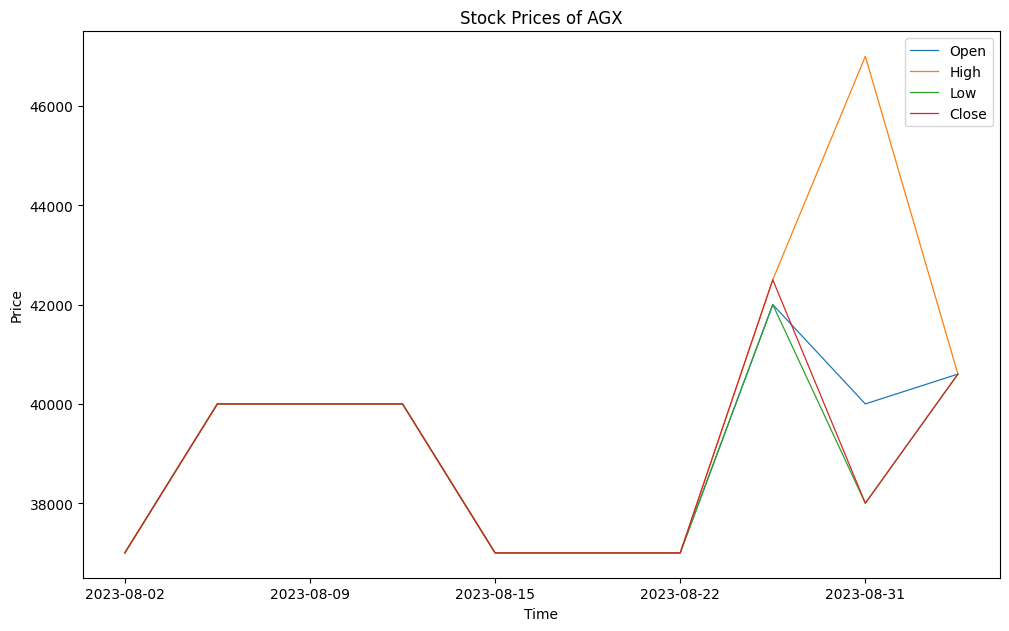

In [14]:
df_AGXs = pd.read_csv(r"/content/AGX_Stock.csv")

# Tạo biểu đồ với các đường (Open, High, Low, Close)
plt.figure(figsize=(10, 6))
plt.plot(df_AGXs['time'], df_AGXs['open'], label='Open', linewidth=0.9)
plt.plot(df_AGXs['time'], df_AGXs['high'], label='High', linewidth=0.9)
plt.plot(df_AGXs['time'], df_AGXs['low'], label='Low', linewidth=0.9)
plt.plot(df_AGXs['time'], df_AGXs['close'], label='Close', linewidth=0.9)

plt.xticks(range(0, len(df_AGXs['time']), 2))
plt.tight_layout()

# Đặt tiêu đề và các nhãn cho biểu đồ
plt.title('Stock Prices of AGX')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Hiển thị biểu đồ
plt.show()

#### Câu 8: Từ file X_Stock.csv trên, vẽ các biểu đồ dạng cột chứa thông tin Volume của cổ phiếu X.

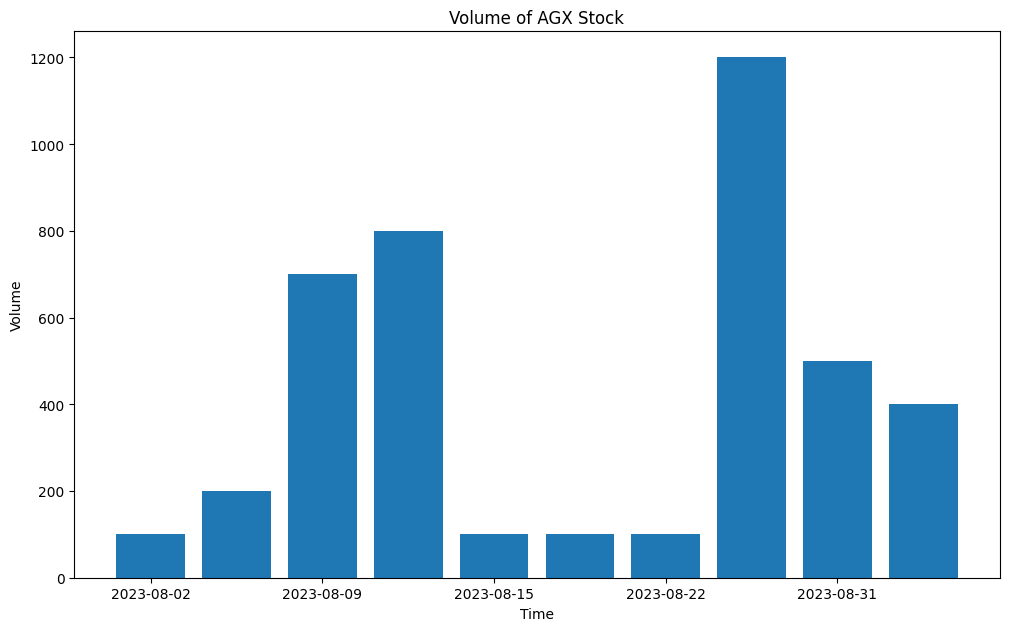

In [15]:
# Tạo biểu đồ dạng cột cho thông tin Volume
plt.figure(figsize=(10, 6))
plt.bar(df_AGXs.time, df_AGXs['volume'])

plt.xticks(range(0, len(df_AGXs['time']), 2))
plt.tight_layout()

# Đặt tiêu đề và các nhãn cho biểu đồ
plt.title('Volume of AGX Stock')
plt.xlabel('Time')
plt.ylabel('Volume')

# Hiển thị biểu đồ
plt.show()

#### Câu 9: Từ file X_Stock.csv trên, xây dựng mô hình hồi quy tuyến tính diễn tả sự phụ thuộc của giá Close với Volume của cổ phiếu X.

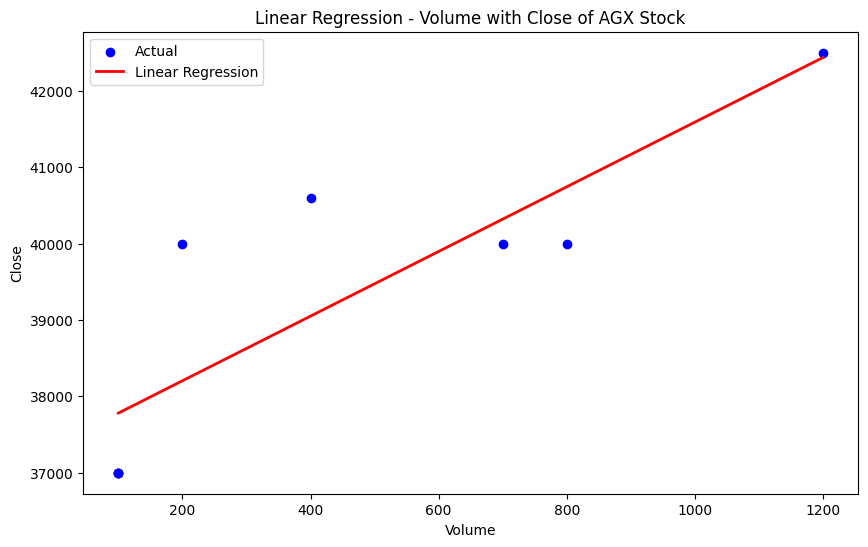

Mô hình hồi quy tuyến tính:
Hệ số tự do của mô hình: 37357.627118644064
Hệ số của biến độc lập Volume: 4.233051
R-square của mô hình: -4.565961648951445
Mean Squared Error: 1391490.4122378612
Root Mean Squared Error: 1179.614518492317


In [19]:
# Tạo features (Volume) và target (Close)
X = df_AGXs['volume'].values.reshape(-1, 1)
y = df_AGXs['close'].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán giá Close dựa trên Volume
y_pred = model.predict(X_test)

# Tạo mảng giá trị mở rộng của dữ liệu X
X_range = np.linspace(min(X), max(X), num=100).reshape(-1, 1)

# Dự đoán giá trị y tương ứng với mảng X_range
y_range = model.predict(X_range)

# Vẽ biểu đồ dữ liệu thực tế và dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_range, y_range, color='red', linewidth=2, label='Linear Regression')

# Đặt tiêu đề và các nhãn cho biểu đồ
plt.title('Linear Regression - Volume with Close of AGX Stock')
plt.xlabel('Volume')
plt.ylabel('Close')
plt.legend()

# Hiển thị biểu đồ
plt.show()

# Lấy ra các hệ số của mô hình
# Mảng các hệ số của mô hình
coefficients = model.coef_
# Giá trị hệ số chặn (intercept)
intercept = model.intercept_
# Giá trị R-square của mô hình
r_square = model.score(X_test, y_test)
# Tính MSE bằng cách lấy trung bình của bình phương sai số giữa giá trị dự đoán và giá trị thực tế
mse = ((y_pred - y_test) ** 2).mean()
# Tính RMSE bằng cách căn bậc hai của MSE và được sử dụng để đo lường độ lớn của sai số trung bình giữa giá trị dự đoán và giá trị thực tế
rmse = np.sqrt(mse)

print("Mô hình hồi quy tuyến tính:")
print("Hệ số tự do của mô hình:", intercept)
print("Hệ số của biến độc lập Volume:", np.round(coefficients[0], 6))
print("R-square của mô hình:", r_square)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

#### Câu 10: Dựa vào mô hình vừa xây dựng ở bước trên, nhập 10 giá trị Volume bất kì và đưa ra dự đoán giá Close tương ứng.

In [20]:
# Nhập chuỗi 10 giá trị Volume bất kỳ
volume_input = input("Nhập chuỗi 10 giá trị Volume (cách nhau bằng dấu phẩy): ")
volume_list = volume_input.split(',')  # Tách chuỗi thành một danh sách các giá trị Volume bằng cách sử dụng dấu phẩy làm dấu phân tách.
new_volume = np.array(volume_list, dtype=int).reshape(-1, 1)  # Tạo một mảng numpy từ danh sách giá trị Volume với kiểu dữ liệu integer và kích thước (số hàng, 1).

# Dự đoán giá Close tương ứng
predicted_close = model.predict(new_volume)

# In kết quả dự đoán
for i, volume in enumerate(new_volume): # Lặp qua từng giá trị Volume trong mảng new_volume và lấy chỉ mục và giá trị Volume tương ứng.
    print(f"Volume: {volume[0]}, Predicted Close: {predicted_close[i]}")

Nhập chuỗi 10 giá trị Volume (cách nhau bằng dấu phẩy): 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000
Volume: 1000, Predicted Close: 41590.67796610169
Volume: 2000, Predicted Close: 45823.728813559326
Volume: 3000, Predicted Close: 50056.77966101695
Volume: 4000, Predicted Close: 54289.83050847458
Volume: 5000, Predicted Close: 58522.88135593221
Volume: 6000, Predicted Close: 62755.932203389835
Volume: 7000, Predicted Close: 66988.98305084747
Volume: 8000, Predicted Close: 71222.03389830509
Volume: 9000, Predicted Close: 75455.08474576272
Volume: 10000, Predicted Close: 79688.13559322036


### Tài liệu tham khảo
##### Slide bài giảng lập trình python trường Đại học Ngân Hàng
##### Tìm hiểu về hàm diff: https://pythonguides.com/python-numpy-diff/?fbclid=IwAR0PPgoDmDzQFm1zT6Z5y7L9M-md5wvJoWxG4DIU6o7s5Ympbb1fJe92E30
##### Hồi quy tuyến tính: https://trituenhantao.io/machine-learning-co-ban/bai-3-linear-regression-hoi-quy-tuyen-tinh/amp/?fbclid=IwAR0ASnjTxnZpToTfjY37F-mjjuGCu8mfjl_lVsYPtgATBlaaOKJf6sB-3PE
##### Hàm loc(): https://www.askpython.com/python-modules/pandas/python-loc-function?fbclid=IwAR3XUwY54-_iXEpiruz0poorZ5U8V-sFhgkOb2uX2pXIs0Gf_CHbHJOLAaM